<a href="https://colab.research.google.com/github/Theanh130124/Datamining_srccode/blob/main/BaiThucHanhNhomTuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# bank_data
df = pd.read_csv("/content/bank-data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [2]:
#Tính toán các giá trị thống kê mô tả cho cột tuổi và thu nhập
print(df['age'].describe().round(2))
print(df['income'].describe().round(2))

count    600.00
mean      42.40
std       14.42
min       18.00
25%       30.00
50%       42.00
75%       55.25
max       67.00
Name: age, dtype: float64
count      600.00
mean     27524.03
std      12899.47
min       5014.21
25%      17264.50
50%      24925.30
75%      36172.67
max      63130.10
Name: income, dtype: float64


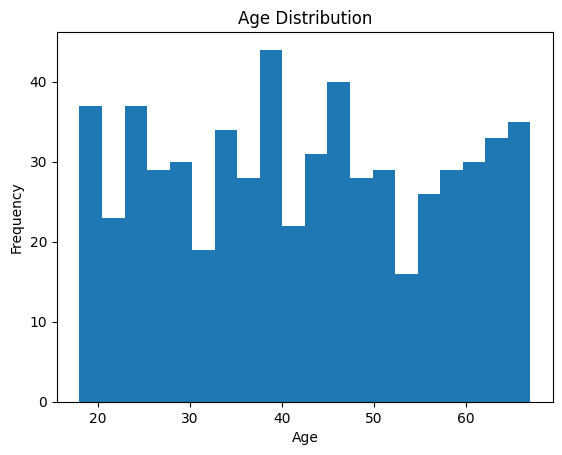

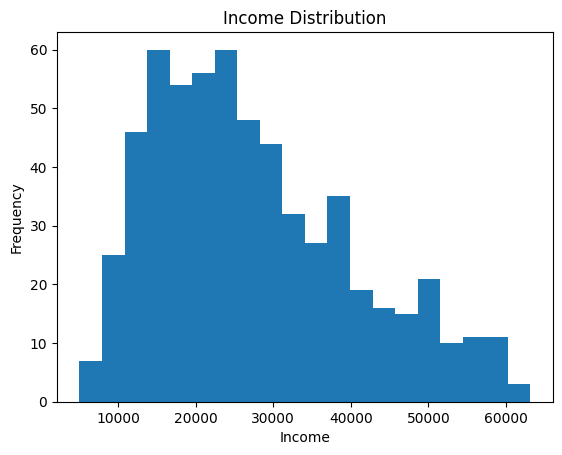

In [3]:
#Vẽ 2 biểu đồ phân bố tần số của tuổi và thu nhập
import matplotlib.pyplot as plt
plt.hist(df['age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.figure()
plt.hist(df['income'],bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
#
plt.show()


In [4]:

#Xóa cột id để ẩn danh thông tin cá nhân
df.drop("id", axis=1, inplace=True)
df

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [5]:

#Tính mode của các cột tình trạng hôn nhân và số con"
print(df['married'].mode())
print(df['children'].mode())


0    YES
Name: married, dtype: object
0    0
Name: children, dtype: int64


In [7]:

#Lưu dữ liệu vào tập tin mới
df.to_csv('bank-data-new.csv', index=False)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Tải dữ liệu
df = pd.read_csv("/content/bank-data.csv")

# Loại bỏ cột 'id'
df.drop("id", axis=1, inplace=True)

# Xác định các tính năng (X) và mục tiêu (y)
X = df.drop('pep', axis=1)
y = df['pep']

# Chuyển đổi các tính năng phân loại thành số bằng cách sử dụng mã hóa one-hot
X = pd.get_dummies(X, columns=['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage'])

# Phương pháp 1: Chia Train-Test (ví dụ: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện bộ phân loại KNN (ví dụ: k=10)
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá mô hình
print("Kết quả chia Train-Test:")
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Độ chính xác:", precision_score(y_test, y_pred, pos_label='YES'))
print("Độ phủ:", recall_score(y_test, y_pred, pos_label='YES'))
print("Điểm F1:", f1_score(y_test, y_pred, pos_label='YES'))

# Phương pháp 2:
knn = KNeighborsClassifier(n_neighbors=70)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print("\nKết quả kiểm tra chéo K-Fold:")
print("Điểm độ chính xác:", scores)
print("Độ chính xác trung bình:", scores.mean())

Kết quả chia Train-Test:
Ma trận nhầm lẫn:
 [[50 16]
 [39 15]]
Độ chính xác: 0.5416666666666666
Độ chính xác: 0.4838709677419355
Độ phủ: 0.2777777777777778
Điểm F1: 0.35294117647058826

Kết quả kiểm tra chéo K-Fold:
Điểm độ chính xác: [0.61666667 0.65       0.61666667 0.58333333 0.7        0.68333333
 0.51666667 0.55       0.66666667 0.53333333]
Độ chính xác trung bình: 0.6116666666666667


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Tải dữ liệu
df = pd.read_csv("/content/bank-data.csv")

# Loại bỏ cột 'id'
df.drop("id", axis=1, inplace=True)

# Chia dữ liệu thành TrainData (90%) và TestData (10%) với phân tầng
TrainData, TestData = train_test_split(df, test_size=0.1, random_state=42, stratify=df['pep'])

# Lưu các tập dữ liệu vào các tệp CSV riêng biệt
TrainData.to_csv('TrainData.csv', index=False)
TestData.to_csv('TestData.csv', index=False)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


TrainData = pd.read_csv("TrainData.csv")
TestData = pd.read_csv("TestData.csv")

# Xác định các tính năng (X) và mục tiêu (y) cho TrainData và TestData
X_train = TrainData.drop('pep', axis=1)
y_train = TrainData['pep']
X_test = TestData.drop('pep', axis=1)
y_test = TestData['pep']

# Chuyển đổi các tính năng phân loại thành số bằng cách sử dụng mã hóa one-hot
X_train = pd.get_dummies(X_train, columns=['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage'])
X_test = pd.get_dummies(X_test, columns=['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage'])

# Điều chỉnh siêu tham số bằng GridSearchCV để tìm k tốt nhất
param_grid = {'n_neighbors': range(1, 100)} # Thử các giá trị k từ 1 đến 100
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy giá trị k tốt nhất
best_k = grid_search.best_params_['n_neighbors']

# Huấn luyện mô hình KNN cuối cùng với k tốt nhất
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = final_knn.predict(X_test)

# Đánh giá mô hình cuối cùng
print("Kết quả mô hình cuối cùng (với k tốt nhất):")
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Độ chính xác:", precision_score(y_test, y_pred, pos_label='YES'))
print("Độ phủ:", recall_score(y_test, y_pred, pos_label='YES'))
print("Điểm F1:", f1_score(y_test, y_pred, pos_label='YES'))

Kết quả mô hình cuối cùng (với k tốt nhất):
Ma trận nhầm lẫn:
 [[27  6]
 [15 12]]
Độ chính xác: 0.65
Độ chính xác: 0.6666666666666666
Độ phủ: 0.4444444444444444
Điểm F1: 0.5333333333333333
